In [22]:
# Beyond Bitswap Test Bed
# Be able to create a yaml file custom.

IntSlider(value=4, description='# nodes', layout=Layout(grid_area='widget006'), max=300, min=2)


In [1]:
import ui
l = ui.Layout()
l.show()
#display(l.testcase, l.input_data, l.file_size, l.files_directory, l.run_count, \
#    l.n_nodes, l.n_leechers, l.n_passive, l.max_peer_connections, l.churn_rate)


GridspecLayout(children=(Text(value='', description='Testcase', layout=Layout(grid_area='widget001')), Text(va…

In [20]:
# Building config and running testcase
import utils
#testid = utils.runner(utils.process_yaml_config("./config.yaml"))
testid = utils.runner(utils.process_layout_config(l))

Running as:  testground run single --plan=beyond-bitswap --builder=docker:go --runner=local:docker --build-cfg skip_runtime_image=true --testcase=ipfs-transfer --instances=6 -tp input_data=random -tp file_size=15728640,31457280,47185920,57671680 -tp leech_count=2 -tp passive_count=0 -tp max_connection_rate=100 -tp run_count=5 -tp bandwidth_mb=100 -tp latency_ms=126 -tp jitter_pct=5
There was an error running the testcase. Check daemon.


In [21]:
# Collecting the data.
utils.collect_data(l, testid)

Cleaning previous runs..

Aug 26 13:56:49.089931	INFO	using home directory: /home/adlrocha/testground
Aug 26 13:56:49.090427	INFO	no .env.toml found at /home/adlrocha/testground/.env.toml; running with defaults
Aug 26 13:56:49.090440	INFO	testground client initialized	{"addr": "localhost:8042"}

>>> Result:

Aug 26 13:56:49.158004	INFO	created file: ad99332a177e.tgz

ad99332a177e/.
ad99332a177e/single
ad99332a177e/single/0
ad99332a177e/single/0/diagnostics.out
ad99332a177e/single/0/results.out
ad99332a177e/single/0/run.err
ad99332a177e/single/0/run.out
ad99332a177e/single/1
ad99332a177e/single/1/diagnostics.out
ad99332a177e/single/1/results.out
ad99332a177e/single/1/run.err
ad99332a177e/single/1/run.out
ad99332a177e/single/2
ad99332a177e/single/2/diagnostics.out
ad99332a177e/single/2/results.out
ad99332a177e/single/2/run.err
ad99332a177e/single/2/run.out
ad99332a177e/single/3
ad99332a177e/single/3/diagnostics.out
ad99332a177e/single/3/results.out
ad99332a177e/single/3/run.err
ad99332a1

In [17]:
import process
agg, testcases = process.aggregate_results()
byLatency = process.groupBy(agg, "latencyMS")
byNodeType = process.groupBy(agg, "nodeType")
byFileSize = process.groupBy(agg, "fileSize")
byBandwidth = process.groupBy(agg, "bandwidthMB")
byTopology = process.groupBy(agg, "topology")

./results/2a294b5c0e57/single/1/results.out
./results/2a294b5c0e57/single/0/results.out


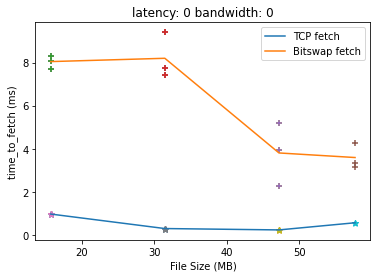

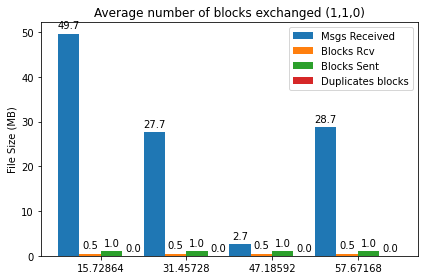

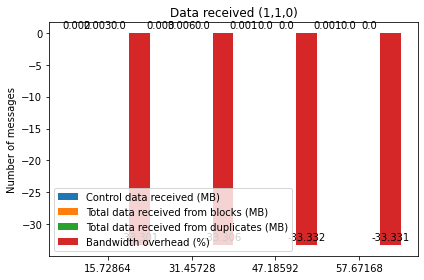

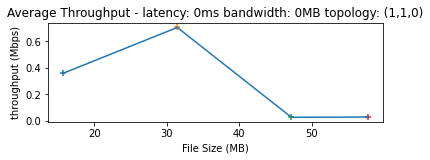

In [18]:
process.plot_latency(byLatency, byBandwidth, byFileSize)
process.plot_messages(byFileSize, byTopology)
process.plot_bw_overhead(byFileSize, byTopology)
process.plot_througput(byLatency, byBandwidth, byFileSize, byTopology, testcases)